# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
print("Libraries imported.")

Libraries imported.


# Loading Dataset

In [2]:
data = pd.read_csv("kddcup.data_10_percent_corrected")
data.shape

(494020, 42)

In [3]:
data.columns

Index(['0', 'tcp', 'http', 'SF', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'normal.'],
      dtype='object')

In [4]:
data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
np.unique(data['normal.'])

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

In [6]:
data['normal.'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: normal., dtype: int64

# Handling Missing Values

In [7]:
data.isna().sum()

0          0
tcp        0
http       0
SF         0
181        0
5450       0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
8          0
8.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
9          0
9.1        0
1.00.1     0
0.00.6     0
0.11.1     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
normal.    0
dtype: int64

In [8]:
print("No missing value is there!")

No missing value is there!


# Handling Categorical Values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

In [10]:
le = LabelEncoder()
data['tcp'] = le.fit_transform(data['tcp'])
data['http'] = le.fit_transform(data['http'])
data['SF'] = le.fit_transform(data['SF'])
data['normal.'] = le.fit_transform(data['normal.'])
data

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,11
1,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
2,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
3,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
4,0,1,22,9,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,11
494016,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,11
494017,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,11
494018,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,11


In [11]:
data.info()
print("Converted.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  int32  
 2   http     494020 non-null  int32  
 3   SF       494020 non-null  int32  
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

# Training 

In [12]:
x = data[['0', 'tcp', 'http', 'SF', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11']]
y = data['normal.']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x.shape)
print(y.shape)

(345814, 41)
(148206, 41)
(345814,)
(148206,)
(494020, 41)
(494020,)


# Standardization

In [13]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [14]:
print("Standardization done.")

Standardization done.


# Modelling 

In [15]:
# Model 1: Random Forest

rf = RandomForestClassifier()
rf.fit(x_train_std, y_train)
pred_train = rf.predict(x_train_std)
pred_test = rf.predict(x_test_std)

print('Training Accuracy of Random forest = ',accuracy_score(y_train,pred_train))
print('Testing Accuracy of Random forest = ',accuracy_score(y_test,pred_test))

Training Accuracy of Random forest =  0.9999942165441538
Testing Accuracy of Random forest =  0.9997638422196132


In [16]:
cpr = classification_report(pred_test,y_test)
print(cpr)

F:\apps\an\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       0.71      0.50      0.59        10
           2       1.00      0.50      0.67         2
           3       0.94      1.00      0.97        16
           4       0.75      0.75      0.75         4
           5       1.00      0.99      1.00       365
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           8       0.33      0.50      0.40         2
           9       1.00      1.00      1.00     32074
          10       0.94      1.00      0.97        66
          11       1.00      1.00      1.00     29388
          12       0.00      0.00      0.00         0
          14       1.00      1.00      1.00        89
          15       1.00      1.00      1.00       312
          16       0.00      0.00      0.00         0
          17       0.99      1.00      0.99       470
          18       1.00    

[[  627     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     3     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   363     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     3     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0    

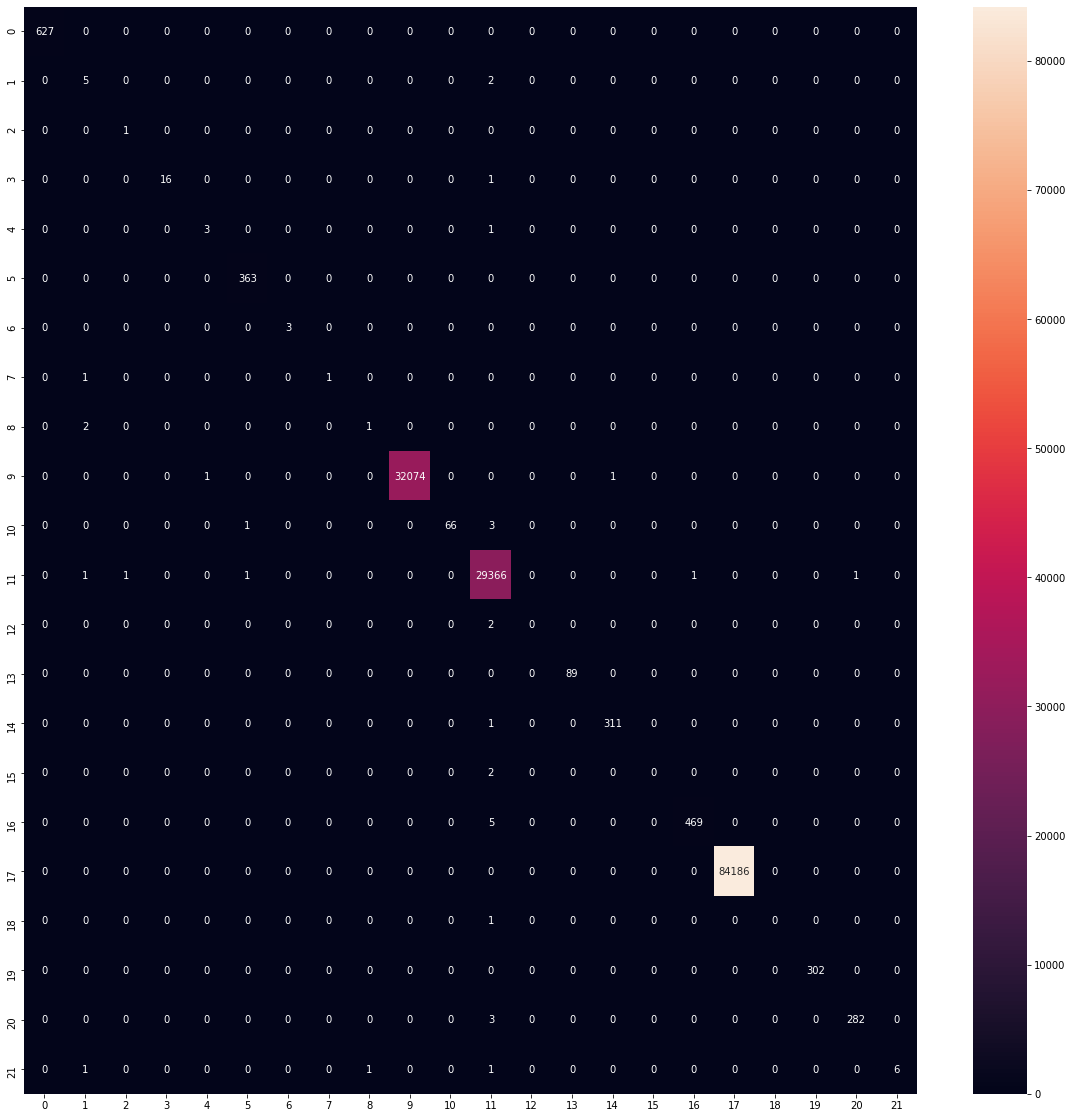

In [17]:
cm = confusion_matrix(y_test,pred_test)
print(cm)
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot = True, fmt = '.0f')

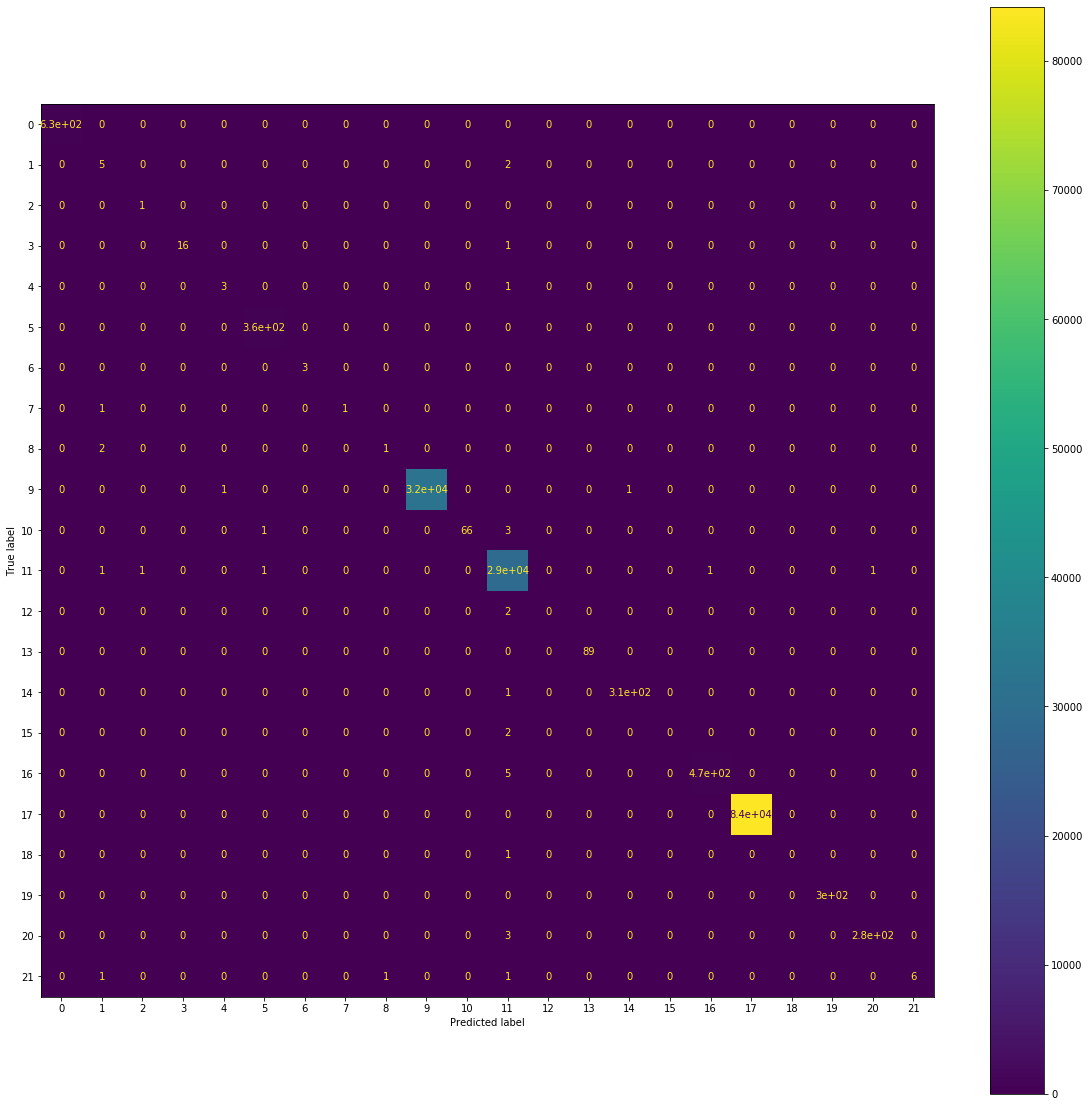

In [18]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_confusion_matrix(rf, x_test_std, y_test, ax = ax)

In [19]:
# Model 2: Decision tree
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)
pred_train1 = dtr.predict(x_train)
pred_test1 = dtr.predict(x_test)

print('Training Accuracy of Decision Tree = ',accuracy_score(y_train,pred_train1))
print('Testing Accuracy of Decision Tree = ',accuracy_score(y_test,pred_test1))

Training Accuracy of Decision Tree =  0.9999942165441538
Testing Accuracy of Decision Tree =  0.9995546738998421


In [20]:
cpr1 = classification_report(pred_test1, y_test)
print(cpr1)

F:\apps\an\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       0.71      0.62      0.67         8
           2       1.00      0.33      0.50         3
           3       0.94      0.94      0.94        17
           4       0.25      0.50      0.33         2
           5       1.00      0.99      1.00       365
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     32075
          10       0.94      0.99      0.96        67
          11       1.00      1.00      1.00     29368
          12       0.00      0.00      0.00         0
          14       1.00      0.99      0.99        90
          15       0.99      0.99      0.99       310
          16       0.00      0.00      0.00         8
          17       0.99      0.98      0.99       478
          18       1.00    

[[  627     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     1     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   363     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     3     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     0    

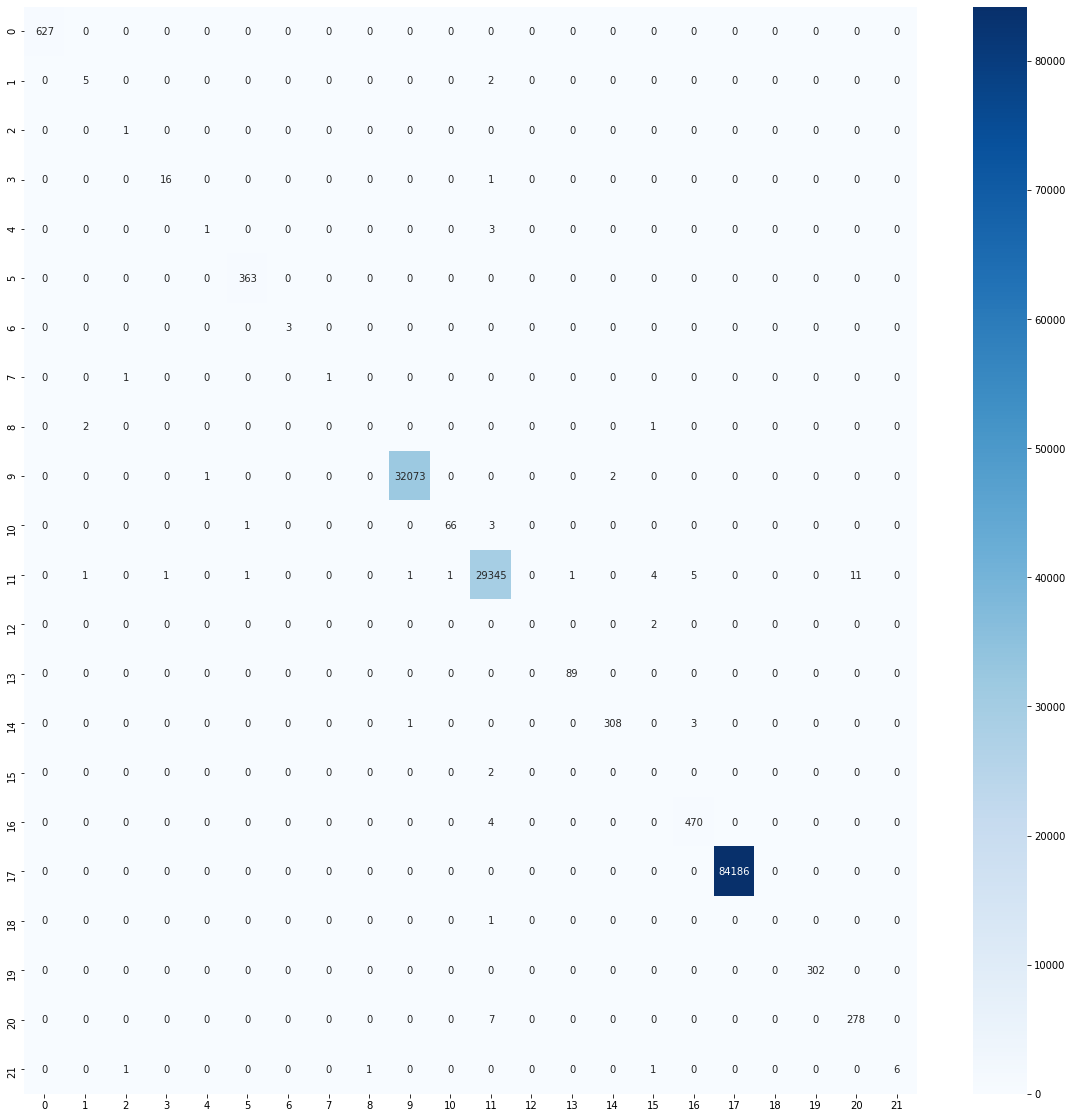

In [21]:
cm1 = confusion_matrix(y_test, pred_test1)
print(cm1)
plt.figure(figsize = (20,20))
sns.heatmap(cm1, annot = True, fmt = '.0f', cmap = 'Blues')

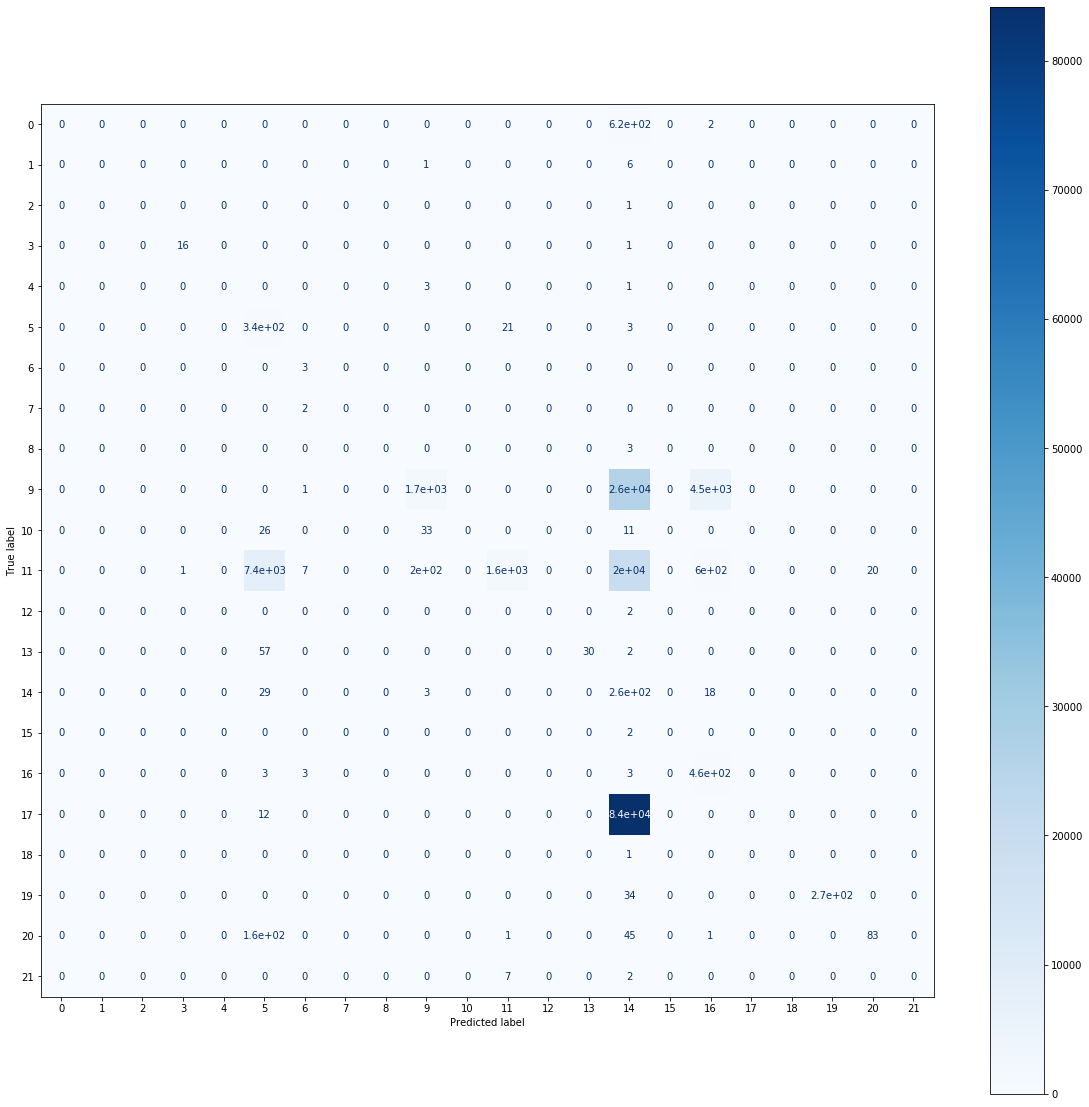

In [22]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_confusion_matrix(dtr, x_test_std, y_test, ax = ax, cmap = 'Blues')

In [23]:
# Model 3: Gaussian NB
gb = GaussianNB()
gb.fit(x_train, y_train)
pred_train2 = gb.predict(x_train)
pred_test2 = gb.predict(x_test)

print('Training Accuracy of Gaussian NB = ',accuracy_score(y_train, pred_train2))
print('Testing Accuracy of Gaussian NB = ',accuracy_score(y_test, pred_test2))

Training Accuracy of Gaussian NB =  0.9368822546224271
Testing Accuracy of Gaussian NB =  0.9365072939017314


In [24]:
cpr2 = classification_report(pred_test2, y_test)
print(cpr2)

F:\apps\an\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\apps\an\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       619
           1       0.43      0.01      0.03       206
           2       0.00      0.00      0.00       202
           3       0.94      0.12      0.22       131
           4       0.00      0.00      0.00        12
           5       1.00      0.14      0.25      2571
           6       0.00      0.00      0.00         0
           7       1.00      0.00      0.01       459
           8       0.00      0.00      0.00        11
           9       1.00      0.96      0.98     33300
          10       0.13      0.00      0.01      3453
          11       0.72      0.99      0.83     21208
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         7
          14       0.98      0.36      0.53       239
          15       0.07      0.07      0.07       336
          16       0.50      0.01      0.01       199
          17       0.82    

[[  619     0     0     0     0     0     0     0     0     0     0     8
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     3     2     0     0     0     0     2     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     3     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   363     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     3     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]

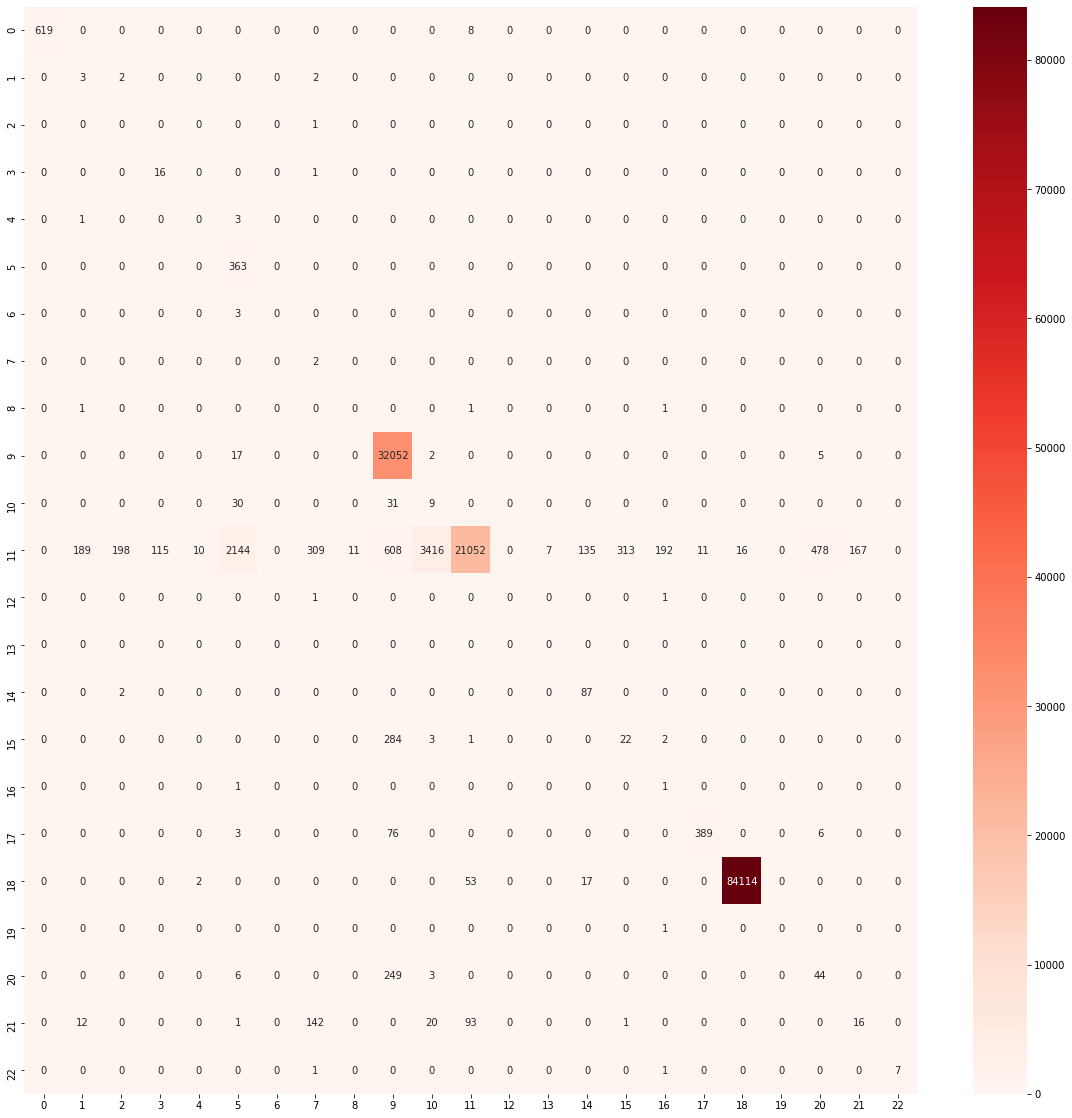

In [25]:
cm2 = confusion_matrix(y_test, pred_test2)
print(cm2)
plt.figure(figsize = (20,20))
sns.heatmap(cm2, annot = True, fmt = '.0f', cmap = 'Reds')

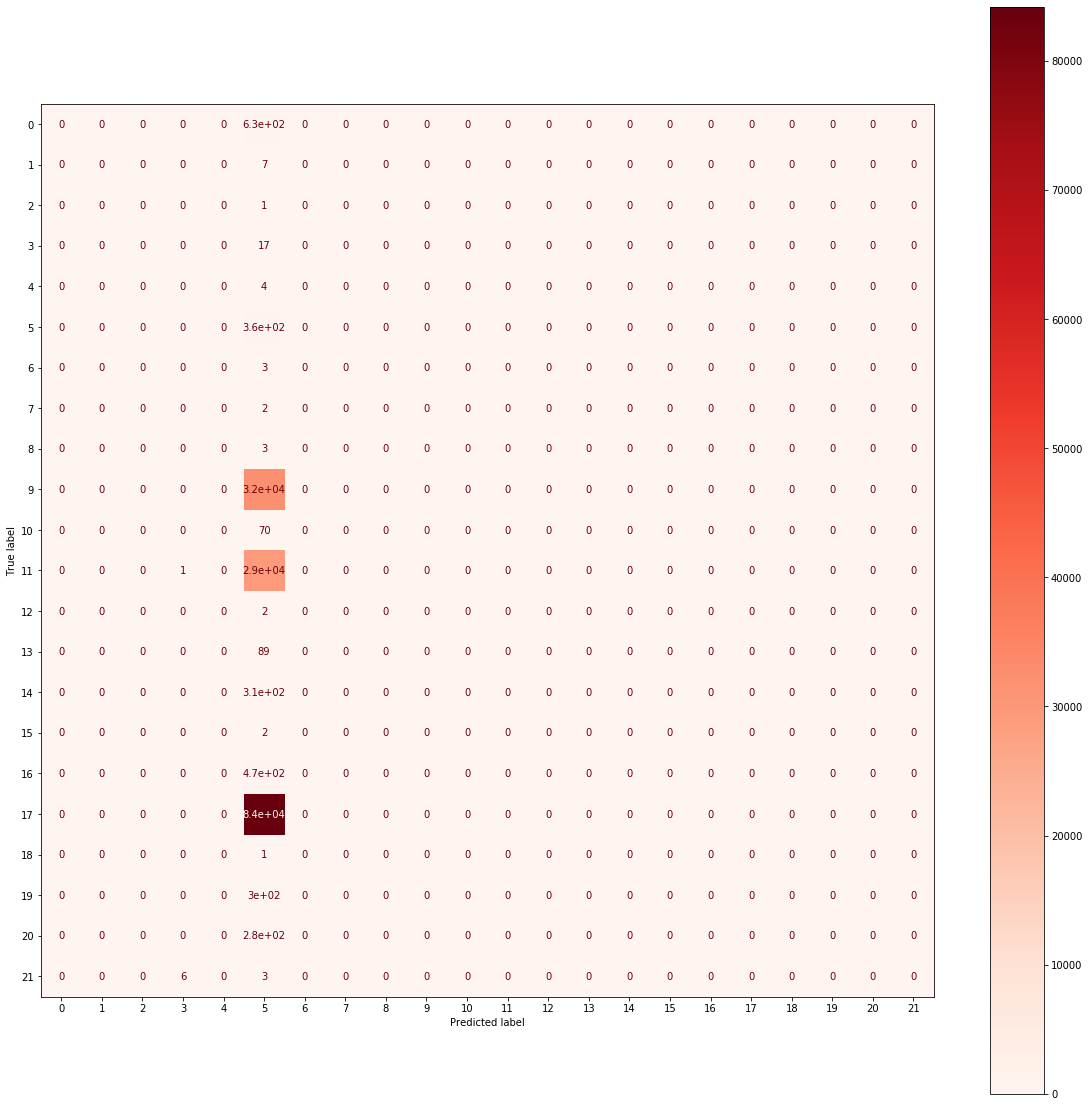

In [26]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_confusion_matrix(gb, x_test_std, y_test, ax = ax, cmap = 'Reds')

# Comparison of 3 Models

In [27]:
clf = [rf, dtr, gb]
name = ['RandomForest', 'DecisionTree', 'GaussianNB']
test = {}
t = {}
for model, names in zip(clf, name):
    st = time.time()
    model.fit(x_train_std, y_train)
    
    pred = model.predict(x_test_std)
    et = time.time()
    acc = accuracy_score(pred, y_test)
    
    test[names] = np.round(acc*100, 1)
    t[names] = np.round((et-st)*1000, 1)
    
for i in test.keys():
    print(i, " - ", test[i], " - ", t[i])

RandomForest  -  100.0  -  84511.2
DecisionTree  -  100.0  -  5910.8
GaussianNB  -  90.4  -  6224.7


<BarContainer object of 3 artists>

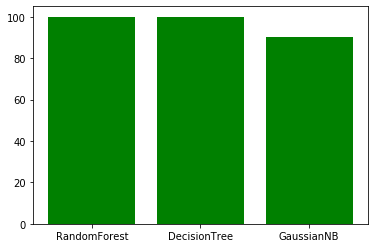

In [28]:
plt.bar(test.keys(), test.values(), color = 'g')

<BarContainer object of 3 artists>

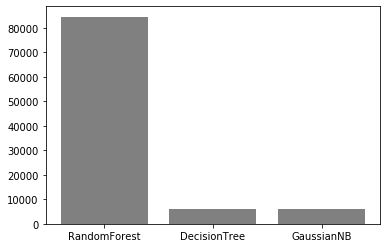

In [29]:
plt.bar(t.keys(), t.values(), color='gray')

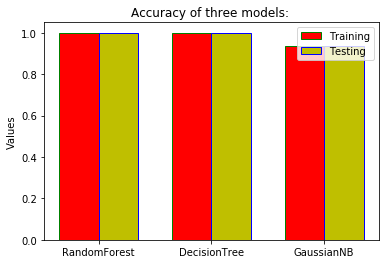

In [30]:
a1 = accuracy_score(y_train,pred_train)
a2 = accuracy_score(y_test,pred_test)

b1 = accuracy_score(y_train,pred_train1)
b2 = accuracy_score(y_test,pred_test1)

c1 = accuracy_score(y_train,pred_train2)
c2 = accuracy_score(y_test,pred_test2)

labels = ['RandomForest', 'DecisionTree', 'GaussianNB']
training = [a1, b1, c1]
testing = [a2, b2, c2]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training, width, label = 'Training', color = 'r', ec = 'g')
rects2 = ax.bar(x + width/2, testing, width, label = 'Testing', color = 'y', ec = 'b')
ax.set_ylabel('Values')
ax.set_title('Accuracy of three models: ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Hyperparameter Tuning 

In [31]:
# Tuning 1: Random Forest

param_dist = {"max_depth": [5, None],
              "max_features": randint(1, 12),
              "min_samples_leaf": randint(1, 12),
              "criterion": ["gini", "entropy"]}

r = RandomForestClassifier()
r_cv = RandomizedSearchCV(r, param_dist, cv = 5)
r_cv.fit(x_train, y_train)

print("Tuned Random Forest Parameters: {}".format(r_cv.best_params_))
print("Best score is {}".format(r_cv.best_score_))

F:\apps\an\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 4}
Best score is 0.9996096166885572


In [32]:
# Tuning 2: Decision Tree

param_dist1 = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

d = DecisionTreeClassifier()
d_cv = RandomizedSearchCV(d, param_dist1, cv = 5)
d_cv.fit(x_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(d_cv.best_params_))
print("Best score is {}".format(d_cv.best_score_))

F:\apps\an\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.9992944180020797


In [33]:
# Tuning 3: Gaussian NB

nb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator = nb, 
                 param_grid = params_NB,  
                 verbose = 1, 
                 scoring = 'accuracy') 

gs_NB.fit(x_train, y_train)
print("Tuned Gaussian NB parameters: ", gs_NB.best_params_)
print("Best score is: ", gs_NB.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


F:\apps\an\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 17.1min finished


Tuned Gaussian NB parameters:  {'var_smoothing': 1e-09}
Best score is:  0.9403870206265037


# Evaluation 

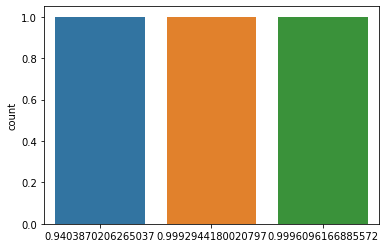

In [35]:
RandomForest = r_cv.best_score_
DecisionTree = d_cv.best_score_
GaussianNB = gs_NB.best_score_
val = [ RandomForest, DecisionTree, GaussianNB]
sns.countplot(val)